In [7]:
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

In [8]:
nqData = yf.download('NQ=F', '2023-01-01', '2024-06-25');
nqClose = nqData['Close']
nqOpen = nqData['Open']
nqHigh = nqData['High']
nqLow = nqData['Low']

[*********************100%%**********************]  1 of 1 completed


In [9]:
#odchylenie standardowe dla zestawu danych ale nie dzienncyh zwrotow
nq_std = np.std(nqClose)
print(nq_std)

2222.8739602447295


In [10]:
#sda dla daily returns
nq_returns = nqClose.pct_change()
print(np.std(nq_returns) * 100)

1.0848122100815107


In [16]:
nq_returns_std = np.std(nq_returns)
threshold_1_5_sda = -1.5 * nq_returns_std

pullback_count = 0
no_pullback_count = 0
pullback_dates = []
no_pullback_dates = []

for i in range(1, len(nq_returns)):
    if nq_returns.iloc[i] <= threshold_1_5_sda:
        close_price = nqClose.iloc[i]
        
        if i + 1 < len(nq_returns):
            next_day_high = nqHigh.iloc[i + 1]
            prev_day_low = nqLow.iloc[i]

            low_broken = nqLow.iloc[i + 1] < prev_day_low
            
            if next_day_high >= close_price * 1.005:
                pullback_count += 1
                pullback_dates.append((nq_returns.index[i + 1].strftime('%Y-%m-%d'), 'yes' if low_broken else 'no'))
            else:
                no_pullback_count += 1
                no_pullback_dates.append((nq_returns.index[i + 1].strftime('%Y-%m-%d'), 'yes' if low_broken else 'no'))

print(f'Number of times a 1.5 SDA downside move was followed by at least a 0.5% pullback: {pullback_count}')
print(f'Number of times a 1.5 SDA downside move was NOT followed by at least a 0.5% pullback: {no_pullback_count}')

print('Dates when pullback occurred:', pullback_dates)
print('\nDates when pullback did not occur:', no_pullback_dates)

Number of times a 1.5 SDA downside move was followed by at least a 0.5% pullback: 20
Number of times a 1.5 SDA downside move was NOT followed by at least a 0.5% pullback: 4
Dates when pullback occurred: [('2023-01-06', 'yes'), ('2023-01-31', 'yes'), ('2023-02-09', 'yes'), ('2023-02-22', 'yes'), ('2023-02-27', 'no'), ('2023-03-10', 'yes'), ('2023-04-26', 'no'), ('2023-06-08', 'yes'), ('2023-07-21', 'yes'), ('2023-08-03', 'yes'), ('2023-08-25', 'yes'), ('2023-09-22', 'yes'), ('2023-10-04', 'yes'), ('2023-10-27', 'no'), ('2024-02-01', 'no'), ('2024-03-06', 'no'), ('2024-04-15', 'yes'), ('2024-04-16', 'yes'), ('2024-04-22', 'no'), ('2024-05-01', 'yes')]

Dates when pullback did not occur: [('2023-02-06', 'yes'), ('2023-02-17', 'yes'), ('2023-10-26', 'yes'), ('2024-01-03', 'yes')]


In [34]:
def pullback_follow(data):
    dataClose = data['Close']
    dataOpen = data['Open']
    dataLow = data['Low']
    dataHigh = data['High']
    dataReturns = dataClose.pct_change()
    
    data_returns_std = np.std(dataReturns)
    threshold_1_5_sda = -1.5 * data_returns_std
    threshold_0_5_sda = 0.5 * data_returns_std

    print(f'SDA for given data: {data_returns_std * 100}')
    
    pullback_count = 0
    no_pullback_count = 0
    pullback_dates = []
    no_pullback_dates = []
    
    for i in range(1, len(dataReturns)):
        if dataReturns.iloc[i] <= threshold_1_5_sda:
            close_price = dataClose.iloc[i]
            
            if i + 1 < len(dataReturns):
                next_day_high = dataHigh.iloc[i + 1]
                prev_day_low = dataLow.iloc[i]
    
                low_broken = dataLow.iloc[i + 1] < prev_day_low
                
                next_day_return = (next_day_high - close_price) / close_price
                if next_day_return >= threshold_0_5_sda:
                    pullback_count += 1
                    pullback_dates.append((dataReturns.index[i + 1].strftime('%Y-%m-%d'), 'yes' if low_broken else 'no'))
                else:
                    no_pullback_count += 1
                    no_pullback_dates.append((dataReturns.index[i + 1].strftime('%Y-%m-%d'), 'yes' if low_broken else 'no'))

    print(f'Number of times a 1.5 SDA downside move was followed by at least a 0.5 SDA pullback: {pullback_count}')
    print(f'Number of times a 1.5 SDA downside move was NOT followed by at least a 0.5 SDA pullback: {no_pullback_count}')

    return pullback_dates, no_pullback_dates

In [35]:
gold = yf.download('GC=F', '2023-09-01', '2024-06-26')
pullback_follow(gold)

[*********************100%%**********************]  1 of 1 completed

SDA for given data: 0.8756766168412203
Number of times a 1.5 SDA downside move was followed by at least a 0.5 SDA pullback: 8
Number of times a 1.5 SDA downside move was NOT followed by at least a 0.5 SDA pullback: 6


([('2023-11-13', 'no'),
  ('2023-12-05', 'yes'),
  ('2024-01-04', 'no'),
  ('2024-05-01', 'yes'),
  ('2024-05-14', 'yes'),
  ('2024-05-24', 'yes'),
  ('2024-06-14', 'no'),
  ('2024-06-24', 'no')],
 [('2023-09-22', 'no'),
  ('2023-09-28', 'yes'),
  ('2023-12-11', 'yes'),
  ('2024-04-23', 'yes'),
  ('2024-05-23', 'yes'),
  ('2024-06-10', 'no')])

In [36]:
pullback_follow(nqData)

SDA for given data: 1.0848122100815107
Number of times a 1.5 SDA downside move was followed by at least a 0.5 SDA pullback: 19
Number of times a 1.5 SDA downside move was NOT followed by at least a 0.5 SDA pullback: 5


([('2023-01-06', 'yes'),
  ('2023-01-31', 'yes'),
  ('2023-02-09', 'yes'),
  ('2023-02-22', 'yes'),
  ('2023-02-27', 'no'),
  ('2023-03-10', 'yes'),
  ('2023-04-26', 'no'),
  ('2023-06-08', 'yes'),
  ('2023-07-21', 'yes'),
  ('2023-08-25', 'yes'),
  ('2023-09-22', 'yes'),
  ('2023-10-04', 'yes'),
  ('2023-10-27', 'no'),
  ('2024-02-01', 'no'),
  ('2024-03-06', 'no'),
  ('2024-04-15', 'yes'),
  ('2024-04-16', 'yes'),
  ('2024-04-22', 'no'),
  ('2024-05-01', 'yes')],
 [('2023-02-06', 'yes'),
  ('2023-02-17', 'yes'),
  ('2023-08-03', 'yes'),
  ('2023-10-26', 'yes'),
  ('2024-01-03', 'yes')])

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Correlation: 0.4754767455236597


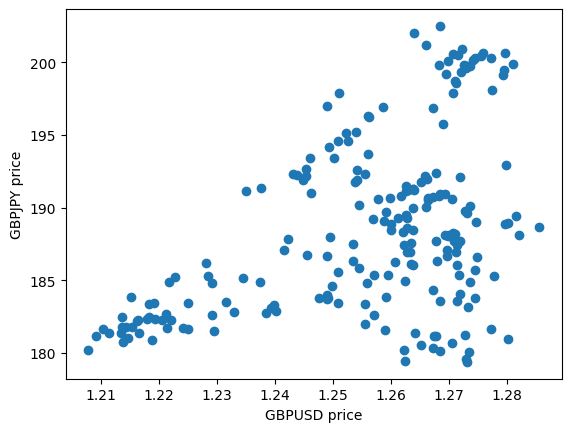

In [39]:
gbpusd = yf.download('GBPUSD=X', '2023-09-01', '2024-06-26')
gbpjpy = yf.download('GBPJPY=X', '2023-09-01', '2024-06-26')

gbpusd = gbpusd['Close']
gbpjpy = gbpjpy['Close']

plt.scatter(gbpusd, gbpjpy)
plt.xlabel('GBPUSD price')
plt.ylabel('GBPJPY price')

plt.plot
print('Correlation: ' + str(np.corrcoef(gbpusd, gbpjpy)[0, 1]))